# Prosper Loan Dataset Explanatory Data Analysis
## by Farnaz Zarian

## Investigation Overview

This project explores data from Prosper which is America's first [marketplace lending platform](https://www.prosper.com/personal-loans). 
This exploration will contain statistics with visualizations to build understanding of Prosper dataset.

## Dataset Overview

The dataset was provided by Udacity as part of the Data Analyst Nanodegree Program certification in January 2021. The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.) with feature documentation available [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv(r'C:\\Users\zariped\Desktop\Data_Science\Udacity\data_visualization\prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Numerical Variables Heatmap

As seen below, there is a strong positive correlation between Borrower APR and Estimated Return with correlation coefficient of 0.79. Also, Borrower APR looks to have a negative relationship with the original loan amount. However, Borrower APR does not seem to be highly correlated with the Stated Monthly Income of the borrower. Let's look into these relationships further in the plots below as the above correlations are computed based on strength of linear relationship in the correlation matrices.

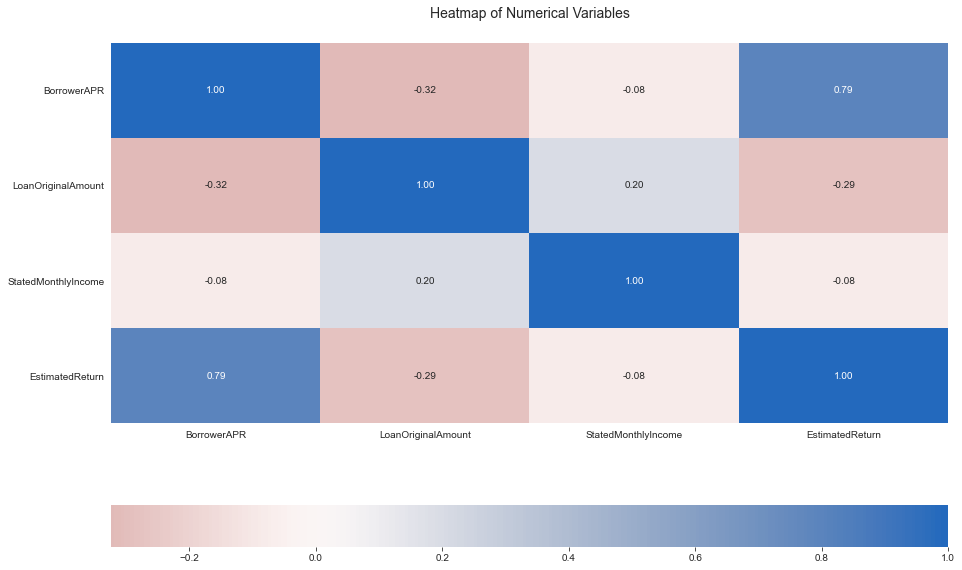

In [15]:
numerical_vars = ['BorrowerAPR', 'LoanOriginalAmount',  'StatedMonthlyIncome',
                  'EstimatedReturn']
# Correlation Matrices 
plt.figure(figsize = [15, 10])
grid_kws = {"height_ratios": (.5, .5), "hspace": .1}
sb.heatmap(loans[numerical_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0, cbar_kws = {'orientation': 'horizontal'});
plt.title('Heatmap of Numerical Variables', fontsize=14, y=1.05);

## Scatter plots and Histograms of Numerical Variables

#### As seen from both the correlation matrices and the scatter plots, borrower APR has a strong positive correlation with the estimated return. The interesting relationships are the relationships between the stated monthly income with the borrower APR and the original loan amount. it looks like a correlation does not exist (correlation coefficient of -0.08 or 0.2 and the corresponding flat lines in the scatter plots). Let's dig deeper into this.

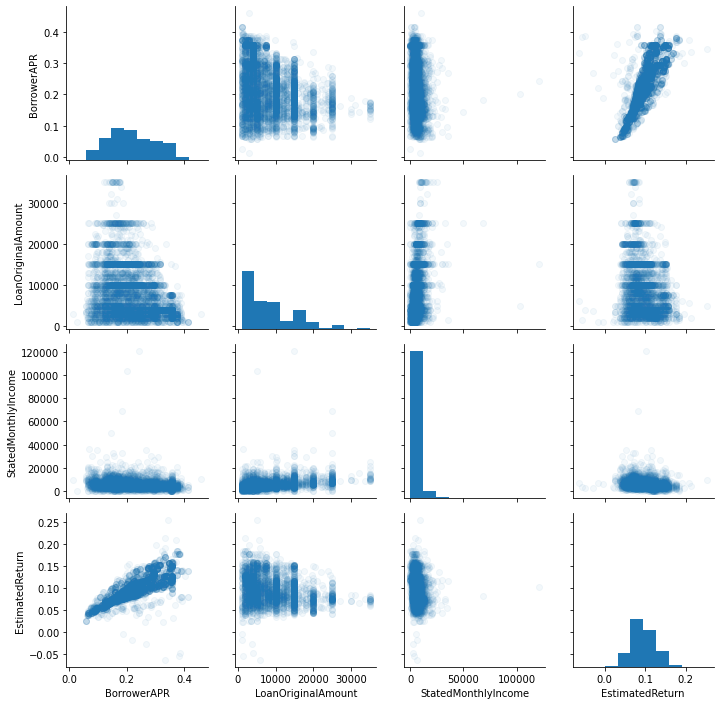

In [5]:
# Sample 5,000 loans to make the plots readable and less busy
loans_sample = loans.sample(5000)
g = sb.PairGrid(data = loans_sample, vars = ['BorrowerAPR', 'LoanOriginalAmount',
                                             'StatedMonthlyIncome', 'EstimatedReturn'])
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 0.05);

## Violin Plots of Categorical Variables

### From the violin plots below, we can conclude the following:

####    - Borrower APR decreases as the prosper score increases as expected. Borrower APR does not follow a specific trend with increasing loan term but it gets less variable as the term of the loan increases, Borrower APR decreases as the employment status improves from not employed to full-time employed and finally, borrower APR decreases as the monthly income range increases. Income range of 100,00 plus has the lowest APR whereas the not employed group has the highest APR. One interesting observation is the median borrower APR and IQR of the full-time employment looks to be bigger than that of part-time employment group.

####    - The original loan amount increases and varies more as the prosper rating improves, also, increasing the term of the loan might be a result of higher loan amounts which is expected. The interesting observation is that the employed category have the highest original loan amounts followed by the self-employed, the full-time employed and the not-employed group. The part-time employed look to have the lowest amount of loans. The 100k (USD) plus income range group has the biggest loans followed by 75k-100k (USD) and 50k-75k (USD).

<Figure size 2520x2160 with 0 Axes>

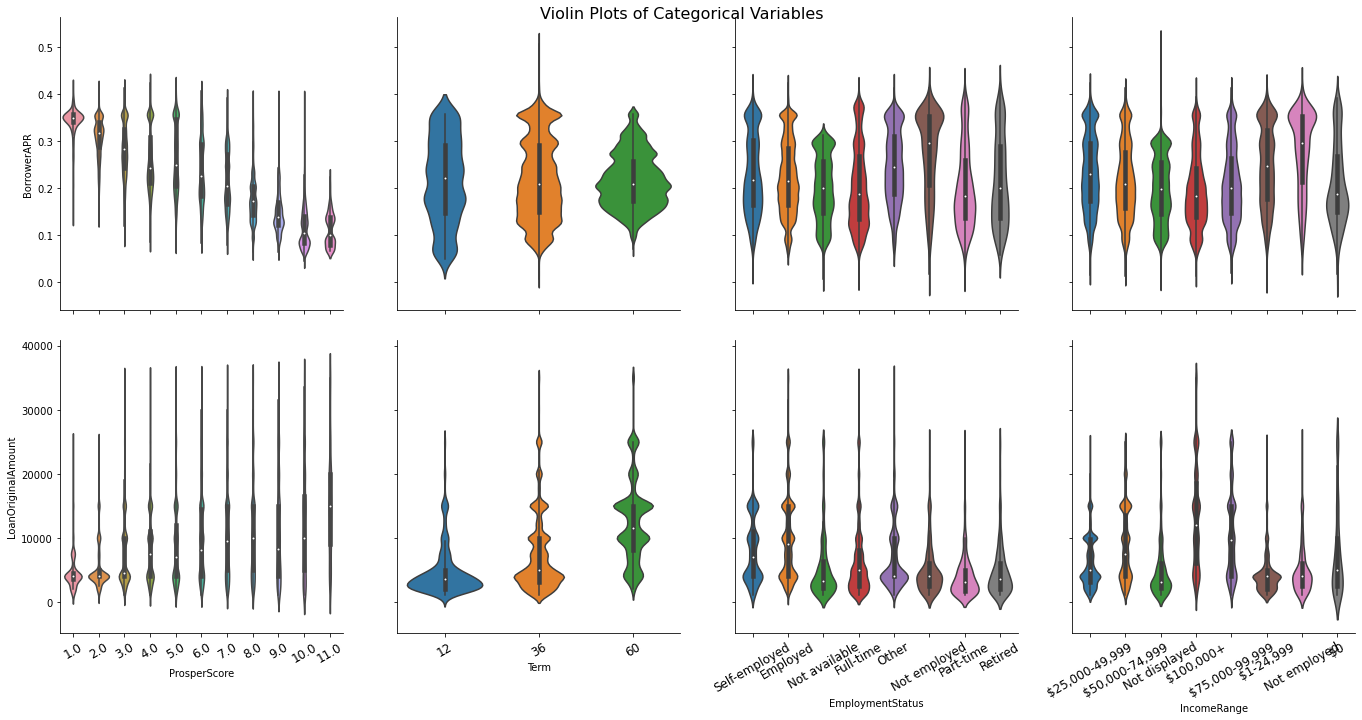

In [10]:
categorical_vars = ['ProsperScore', 'Term', 'EmploymentStatus', 'IncomeRange']

# Plot numeric variables against categorical variables
plt.figure(figsize = [35, 30]);
base_color = sb.color_palette()[0];
g = sb.PairGrid(data = loans, x_vars = categorical_vars,
                y_vars = ['BorrowerAPR', 'LoanOriginalAmount']);
g.map(sb.violinplot, inner = 'box', height=3, aspect=.8, saturation=0.75);
g.fig.set_size_inches(20,10);
for ax in g.axes.flat: 
    ax.set_xticklabels(ax.get_xticklabels(), size = 12, rotation=30);
g.fig.suptitle('Violin Plots of Categorical Variables', fontsize=16);

## Scatter Plots of APR vs. Original Loan Amount along Income Range & Employment Status

#### The negative relationship between Borrower APR versus the original loan amount can be observed from the scatter plots below. We can see that the number of loans decrease as the employment status worsens. One interesting anamoly is the scatter plot of APR vs. LoanOriginalAmount which unlike all other plots, shows a positive correlation between APR and o riginal loan amount. This anomaly will be investigated further in the plot below.

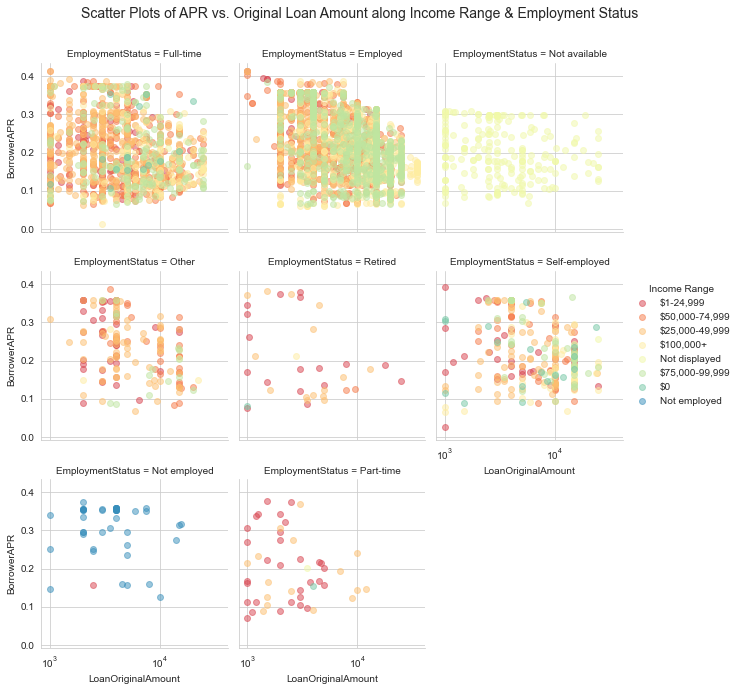

In [13]:
sb.set_style("whitegrid");
g = sb.FacetGrid(data = loans_sample, col = 'EmploymentStatus', hue = 'IncomeRange', col_wrap = 3,
                  palette = 'Spectral');
g.map(plt.scatter, "LoanOriginalAmount", "BorrowerAPR", alpha=.5).add_legend(title="Income Range");
plt.xscale('log');
g.fig.suptitle('Scatter Plots of APR vs. Original Loan Amount along Income Range & Employment Status', fontsize=14, y=1.05);

## Scatter Plots of APR vs. Original Loan Amount along Employment Status and Loan Term

#### We can clearly see  that the employed and full-time groups hold the highest number of longer term loans (60 and 36 months). As the employment status becomes less stable, the loans 36 months loan term gets more popular. One interesting fact is that overal, there are very few loans with a 12 month term. We can also see that the number of loans longer term loans increase as the employment status improves.

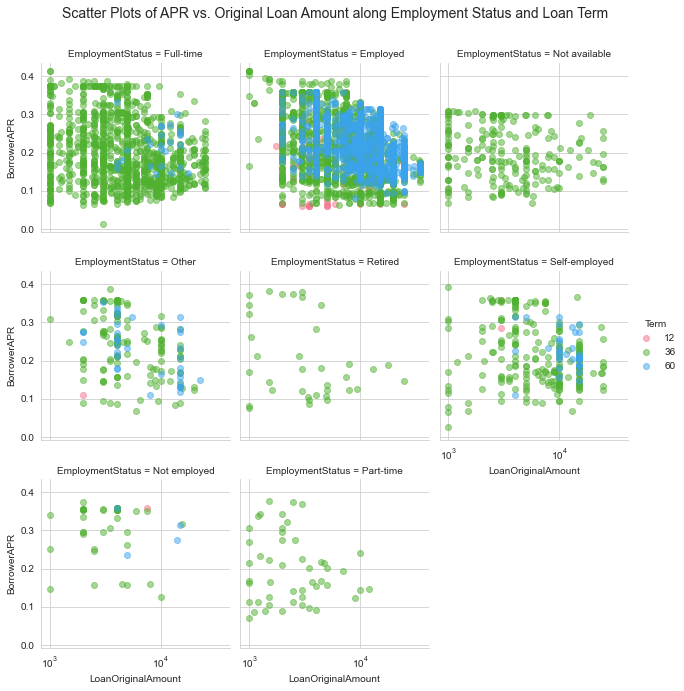

In [12]:
g =  sb.FacetGrid(data = loans_sample, col = 'EmploymentStatus', hue = 'Term', col_wrap = 3, palette = 'husl');
g.map(plt.scatter, "LoanOriginalAmount", "BorrowerAPR", alpha=.5).add_legend();
plt.xscale('log');
g.fig.suptitle('Scatter Plots of APR vs. Original Loan Amount along Employment Status and Loan Term', fontsize=14, y=1.05);

## 'Scatter Plots of APR vs. Original Loan Amount along Employment Status and Credit Score'

#### From the below scatter plots, we can see  that the borrowers with the highest credit scores, enjoy the lowest APR loans in all  employment groups. Moreover, the highest credit scores belong to the *Employed*, *Full-time* and  *Self-employed* groups.

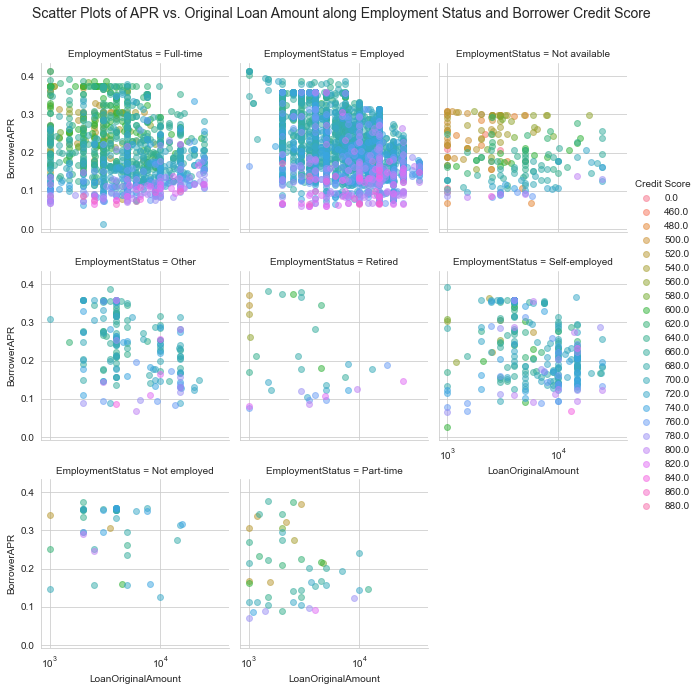

In [14]:
g =  sb.FacetGrid(data = loans_sample, col = 'EmploymentStatus', hue = 'CreditScoreRangeLower', col_wrap = 3, palette = 'husl');
g.map(plt.scatter, "LoanOriginalAmount", "BorrowerAPR", alpha=.5).add_legend(title="Credit Score");
plt.xscale('log');
g.fig.suptitle('Scatter Plots of APR vs. Original Loan Amount along Employment Status and Borrower Credit Score', fontsize=14, y=1.05);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!